In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = np.eye(5)
a

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
data_path = 'ex1data1.txt'
data = pd.read_csv(data_path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


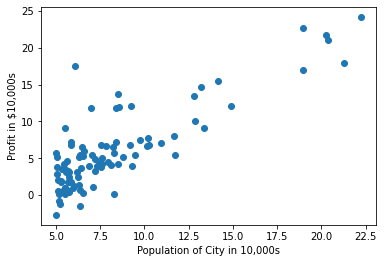

In [5]:
plt.scatter(data['Population'],data['Profit'])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [6]:
def computeCost(X,y,theta):
    inner = np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [7]:
data.insert(0,'Ones',1)

In [8]:
cols = data.shape[1]
X = data.iloc[:,0:cols-1] # X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols] # y是所有行，最后一列

In [9]:
X.head(),y.head()

(   Ones  Population
 0     1      6.1101
 1     1      5.5277
 2     1      8.5186
 3     1      7.0032
 4     1      5.8598,
     Profit
 0  17.5920
 1   9.1302
 2  13.6620
 3  11.8540
 4   6.8233)

In [10]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [11]:
theta

matrix([[0, 0]])

In [12]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [13]:
computeCost(X,y,theta)

32.072733877455676

In [14]:
def gradientDescent(X,y,theta,alpha,iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X*theta.T)-y
        for j in range(parameters):
            term = np.multiply(error,X[:,j])
            temp[0,j] = theta[0,j]-((alpha / len(X)))*np.sum(term)
        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta, cost

In [15]:
alpha=0.01
iters=1000

In [16]:
g,cost=gradientDescent(X,y,theta,alpha,iters)
g

matrix([[-3.24140214,  1.1272942 ]])

In [17]:
computeCost(X,y,g)

4.515955503078914

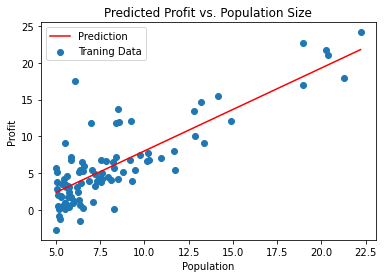

In [18]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots()
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

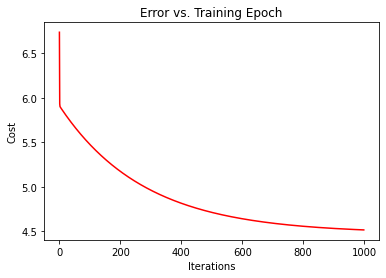

In [19]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [20]:
data2_path = 'ex1data2.txt'
data2 = pd.read_csv(data2_path,header=None,names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
data2 = (data2 - np.mean(data2))/np.std(data2)
data2.head()

,Size,Bedrooms,Price
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


In [22]:
data2.insert(0,'Ones',1)
cols2 = data2.shape[1]
X2 = data2.iloc[:,:cols2-1]
y2 = data2.iloc[:,cols2-1:cols2]
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))
g2,cost2 = gradientDescent(X2,y2,theta2,alpha,iters)
computeCost(X2,y2,g2)

0.13354178879075576

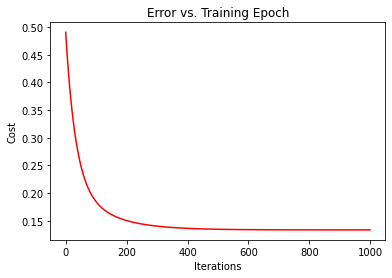

In [24]:
fig,ax=plt.subplots()
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [29]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X,y)

D:\Program Files\Python\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
D:\Program Files\Python\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


LinearRegression()

D:\Program Files\Python\lib\site-packages\sklearn\utils\validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


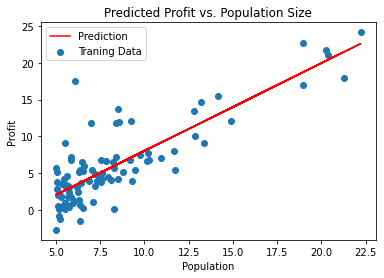

In [38]:
x = np.array(X[:,1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots()
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [39]:
# 正规方程
def normalEqn(X, y):
    return np.linalg.inv(X.T@X)@X.T@y

In [40]:
final_theta2=normalEqn(X, y) # 感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])